In [3]:
import pandas as pd

In [10]:
file_path = "/home/shariya/pandas-practice-task/movies.csv"
data = pd.read_csv(file_path)
print(data.to_string(index=False))

                   movie     genre  rating   votes  revenue
         The Dark Knight   Romance     6.7 1299780   560.49
               Inception  Thriller     7.3   83002      NaN
            Interstellar    Action     8.4 1047098   746.09
                 Titanic Animation     7.1  168034   544.23
           The Godfather   Romance     8.8 1849513   438.89
The Shawshank Redemption   Romance     6.1  729044   267.36
       Avengers: Endgame     Drama     9.2 1501181   899.47
              The Matrix     Drama     NaN 1560693   989.35
            Forrest Gump     Drama     7.7 1512044   257.40
               Gladiator   Romance     6.4 1941935   377.01
                   Joker    Comedy     6.7  310980   931.18
                Parasite    Comedy     6.4  385895   230.80
           The Lion King    Comedy     8.0 1161412   802.70
                  Frozen  Thriller     7.8  131304   498.00
               Toy Story    Action     NaN 1589835   758.21
            Finding Nemo  Thriller     9

7.334615384615384


In [25]:

data["rating"] = data["rating"].fillna(data["rating"].mean())
print(data.dropna(subset=["revenue"]))


                       movie      genre    rating    votes  revenue
0            The Dark Knight    Romance  6.700000  1299780   560.49
2               Interstellar     Action  8.400000  1047098   746.09
3                    Titanic  Animation  7.100000   168034   544.23
4              The Godfather    Romance  8.800000  1849513   438.89
5   The Shawshank Redemption    Romance  6.100000   729044   267.36
6          Avengers: Endgame      Drama  9.200000  1501181   899.47
7                 The Matrix      Drama  7.334615  1560693   989.35
8               Forrest Gump      Drama  7.700000  1512044   257.40
9                  Gladiator    Romance  6.400000  1941935   377.01
10                     Joker     Comedy  6.700000   310980   931.18
11                  Parasite     Comedy  6.400000   385895   230.80
12             The Lion King     Comedy  8.000000  1161412   802.70
13                    Frozen   Thriller  7.800000   131304   498.00
14                 Toy Story     Action  7.33461

In [23]:
top_movies_by_rating = data.sort_values(by="rating", ascending=False).head(10)
print(top_movies_by_rating)


                movie      genre  rating    votes  revenue
6   Avengers: Endgame      Drama     9.2  1501181   899.47
26       Pulp Fiction      Drama     9.2   309349   771.76
15       Finding Nemo   Thriller     9.1   778015   716.80
22             Avatar  Animation     9.0   694180   705.64
4       The Godfather    Romance     8.8  1849513   438.89
2        Interstellar     Action     8.4  1047098   746.09
12      The Lion King     Comedy     8.0  1161412   802.70
18      Black Panther      Drama     7.8  1350569   779.63
13             Frozen   Thriller     7.8   131304   498.00
16              Shrek     Comedy     7.7  1583100   268.34


In [27]:
average_rating_per_genre = data.groupby("genre")["rating"].mean()
print(average_rating_per_genre)

genre
Action       7.117308
Animation    7.240000
Comedy       7.200000
Drama        8.246923
Romance      6.747802
Thriller     7.620000
Name: rating, dtype: float64


In [30]:
highest_revenue = data.sort_values(by="revenue", ascending=False).dropna(subset=["revenue"])
print(highest_revenue)

                       movie      genre    rating    votes  revenue
7                 The Matrix      Drama  7.334615  1560693   989.35
10                     Joker     Comedy  6.700000   310980   931.18
6          Avengers: Endgame      Drama  9.200000  1501181   899.47
12             The Lion King     Comedy  8.000000  1161412   802.70
20            Doctor Strange    Romance  6.000000  1550083   780.75
18             Black Panther      Drama  7.800000  1350569   779.63
26              Pulp Fiction      Drama  9.200000   309349   771.76
14                 Toy Story     Action  7.334615  1589835   758.21
2               Interstellar     Action  8.400000  1047098   746.09
19                  Iron Man     Action  7.334615   362048   731.82
29                        Up     Action  5.400000  1896073   720.52
15              Finding Nemo   Thriller  9.100000   778015   716.80
22                    Avatar  Animation  9.000000   694180   705.64
21              The Avengers    Romance  5.90000

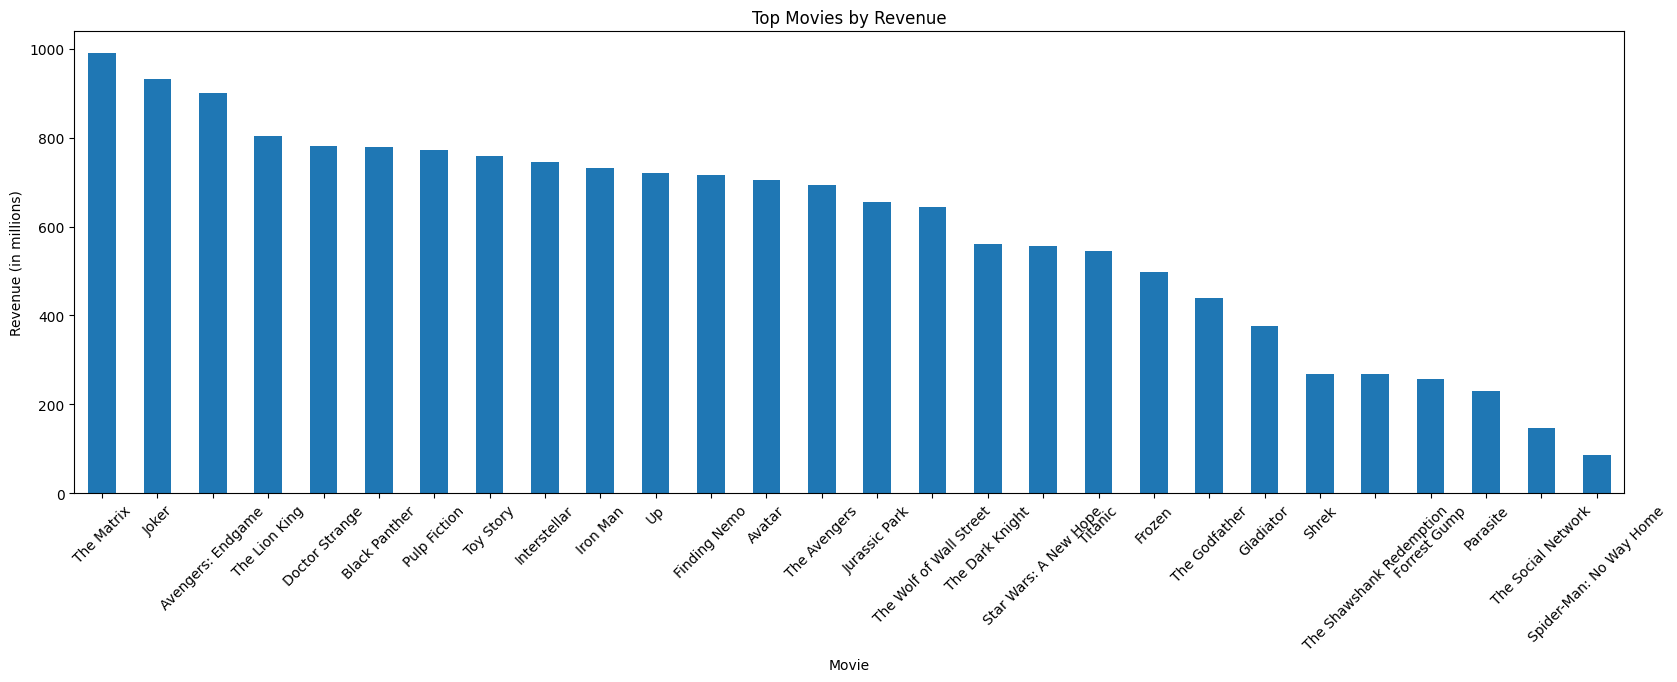

In [36]:
# highest_revenue.plot(kind="bar", figsize=(10,6))
# plt.title("Top Movies by Revenue")
# plt.ylabel("Revenue (in millions)")
# plt.xlabel("Movie")
# plt.xticks(rotation=45)
# plt.show()

highest_revenue.set_index("movie")["revenue"].plot(kind="bar", figsize=(20,6))

plt.title("Top Movies by Revenue")
plt.ylabel("Revenue (in millions)")
plt.xlabel("Movie")
plt.xticks(rotation=45)
plt.show()





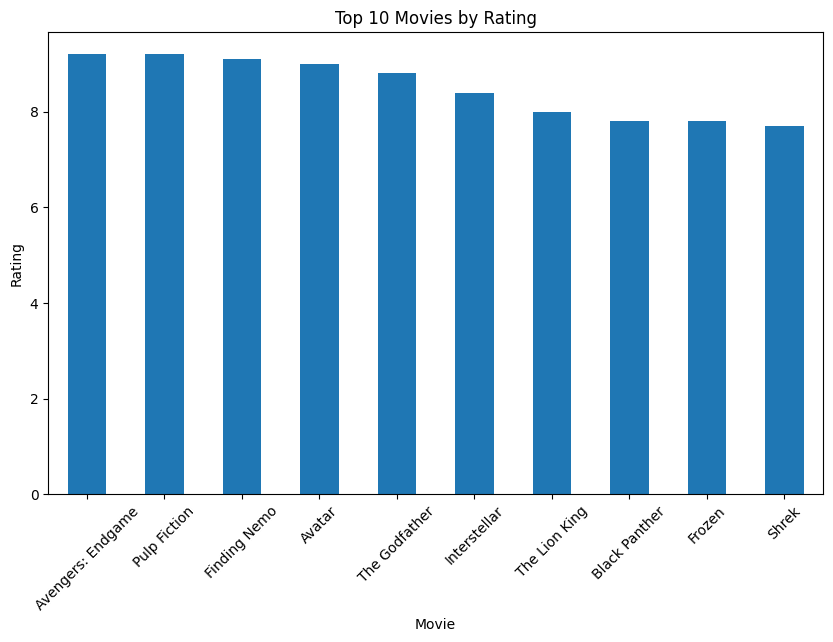

In [37]:
highest_rating = data.sort_values(by="rating", ascending=False).head(10)
highest_rating.set_index("movie")["rating"].plot(kind="bar", figsize=(10,6))
plt.title("Top 10 Movies by Rating")
plt.ylabel("Rating")
plt.xlabel("Movie")
plt.xticks(rotation=45)
plt.show()


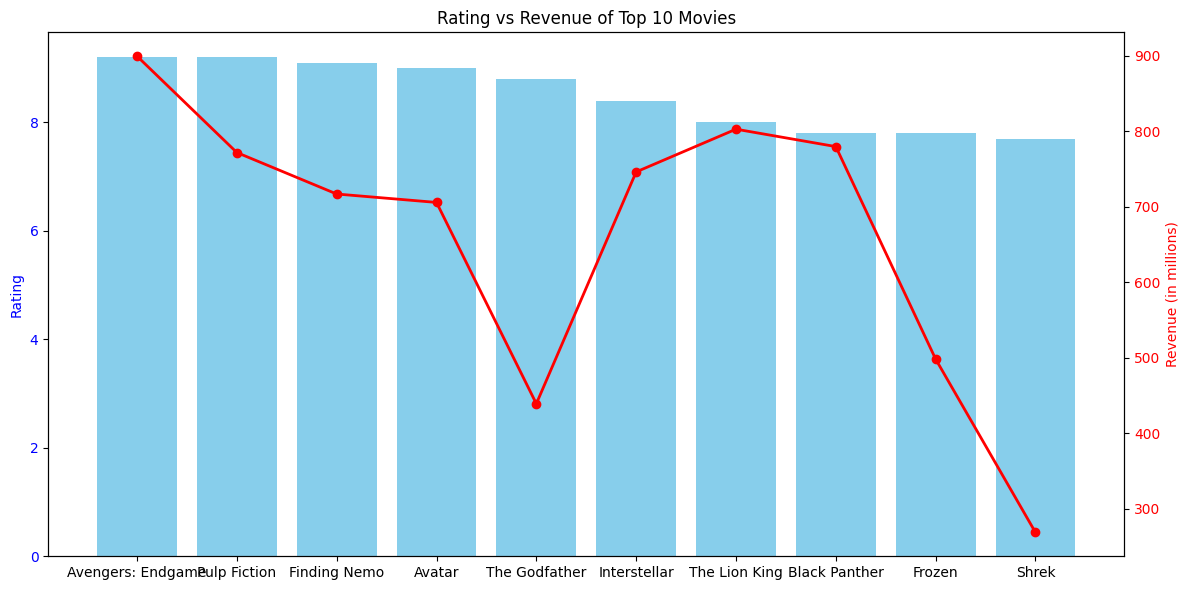

In [38]:

top_movies = data.sort_values(by="rating", ascending=False).head(10)
top_movies = top_movies.set_index("movie")  
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot Rating (left y-axis)
ax1.bar(top_movies.index, top_movies["rating"], color="skyblue", label="Rating")
ax1.set_ylabel("Rating", color="blue")
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for Revenue
ax2 = ax1.twinx()
ax2.plot(top_movies.index, top_movies["revenue"], color="red", marker='o', linewidth=2, label="Revenue")
ax2.set_ylabel("Revenue (in millions)", color="red")
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Rating vs Revenue of Top 10 Movies")
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()